In [1]:
def allInOne(path):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    def filterArraysToShortest(arr1, arr1Pos, arr2, arr2Pos):
        both_pos = np.logical_and(arr1Pos, arr2Pos)
        arr1Filt = arr1[both_pos] 
        arr2Filt = arr2[both_pos] 
    
        return arr1Filt, arr2Filt
    
    
    def filterArraysToShortest2(arr1, arr1Pos, arr2, arr2Pos):
        if np.count_nonzero(arr1Pos) < np.count_nonzero(arr2Pos):
            arr1Filt = arr1[arr1Pos] 
            arr2Filt = arr2[arr1Pos] 
        else:
            arr1Filt = arr1[arr2Pos] 
            arr2Filt = arr2[arr2Pos] 
            
        return arr1Filt, arr2Filt
    
    df = pd.read_csv(path)
    display(df.head(5))
    
    reps = df['rep'].to_numpy()
    hopsRanked = df['hopsRanked'].to_numpy()
    hopsUnranked = df['hopsUnranked'].to_numpy()
    hopsRankedOne = df['hopsRankedOne'].to_numpy()
    hopsPath = df['hopsPath'].to_numpy()

    hopsRankedPositive = hopsRanked > -1
    hopsUnrankedPositive = hopsUnranked > -1
    hopsRankedOnePositive = hopsRankedOne > -1
    hopsPathPositive = hopsPath > -1
    
    total = len(df.index)

    successesRanked = np.count_nonzero(hopsRanked > -1)
    successesRankedOne = np.count_nonzero(hopsRankedOne > -1)
    successesUnranked = np.count_nonzero(hopsUnranked > -1)
    successesPath = np.count_nonzero(hopsPath > -1)

    print("Resilience Paths: {}%".format((successesPath / total) * 100))
    print("Resilience One Tree: {}%".format((successesRankedOne / total) * 100))
    print("Resilience Trees: {}%".format((successesRanked / total) * 100))
    #print("Resilience Unranked: {}%".format((successesUnranked / total) * 100))

  
    hopsPathFiltered,hopsRankedFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRanked, hopsRankedPositive)   
    
    diff = np.subtract(hopsPathFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5)
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Trees beat paths in {} runs".format(higherZero))
    print("Paths beat trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))
    

    hopsPathFiltered,hopsRankedOneFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRankedOne, hopsRankedOnePositive)   

    diff = np.subtract(hopsPathFiltered,hopsRankedOneFiltered)
    plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("One Tree beat paths in {} runs".format(higherZero))
    print("Paths beat one tree in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))




    hopsRankedOneFiltered,hopsRankedFiltered = filterArraysToShortest(hopsRankedOne, hopsRankedOnePositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsRankedOneFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Multiple Trees beat One Tree in {} runs".format(higherZero))
    print("One Tree beat  multiple trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))




    hopsUnrankedFiltered,hopsRankedFiltered = filterArraysToShortest(hopsUnranked, hopsUnrankedPositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsUnrankedFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Ranked Trees beat Unranked Tree in {} runs".format(higherZero))
    print("Unranked Tree beat ranked trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))

## CLUSTERED, 60%, -30% per hop

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,999,25,56,graphml/AttMpls.graphml,9,8,clustered,0.6;-0.3,2,2,2,0,0,4,2,2,2,0,0,shortest
1,998,25,56,graphml/AttMpls.graphml,3,2,clustered,0.6;-0.3,5,5,3,2,0,10,7,5,5,2,0,shortest
2,997,25,56,graphml/AttMpls.graphml,2,1,clustered,0.6;-0.3,3,3,3,0,0,8,5,3,3,0,0,shortest
3,996,25,56,graphml/AttMpls.graphml,3,2,clustered,0.6;-0.3,3,3,3,0,0,3,0,5,5,2,0,shortest
4,995,25,56,graphml/AttMpls.graphml,2,1,clustered,0.6;-0.3,3,3,4,-1,12,-1,-5,3,3,-1,0,shortest


Resilience Paths: 65.8675799086758%
Resilience One Tree: 97.03196347031964%
Resilience Trees: 99.31506849315068%


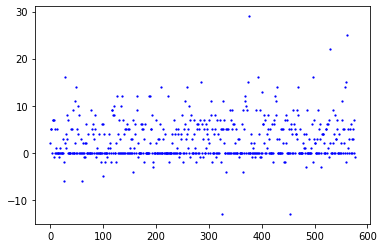

Trees beat paths in 291 runs
Paths beat trees in 47 runs
Both performed equally good in 239 runs


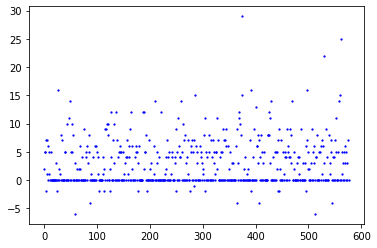

One Tree beat paths in 286 runs
Paths beat one tree in 21 runs
Both performed equally good in 270 runs


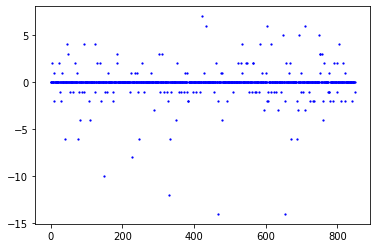

Multiple Trees beat One Tree in 63 runs
One Tree beat  multiple trees in 88 runs
Both performed equally good in 699 runs


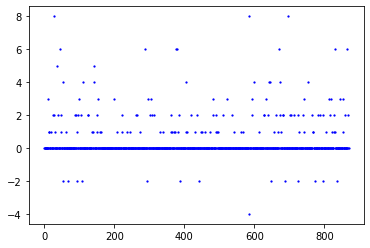

Ranked Trees beat Unranked Tree in 132 runs
Unranked Tree beat ranked trees in 14 runs
Both performed equally good in 724 runs


In [17]:
allInOne("CSVs/trees-2021-08-02_10-54-26-n25.csv")

## CLUSTERED, 50%, -15% per hop

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch,nodeAdditions,hopsPath,hopsRankedOne,hopsUnrankedOne,overallNodeAdditionsOne
0,999,100,245,0.05,4,3,clustered,0.5;-0.15,3,3,3,0,4,3,3,3,2
1,997,100,232,0.05,1,0,clustered,0.5;-0.15,16,8,6,10,10,-1,16,8,10
2,996,100,278,0.05,1,0,clustered,0.5;-0.15,7,7,5,2,4,-1,7,7,4
3,994,100,231,0.05,8,7,clustered,0.5;-0.15,-1,-1,5,-6,0,-1,-1,-1,0
4,993,100,256,0.05,3,2,clustered,0.5;-0.15,-1,-1,6,-7,0,-1,-1,-1,0


Resilience Paths: 36.90322580645161%
Resilience One Tree: 45.16129032258064%
Resilience Trees: 64.77419354838709%


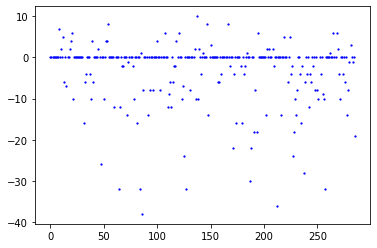

Trees beat paths in 35 runs
Paths beat trees in 98 runs
Both performed equally good in 153 runs


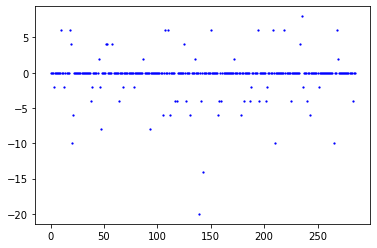

One Tree beat paths in 21 runs
Paths beat one tree in 39 runs
Both performed equally good in 226 runs


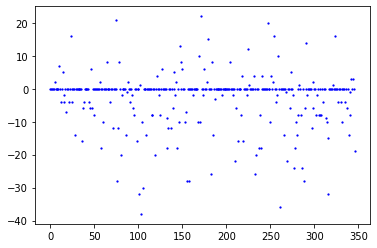

Multiple Trees beat One Tree in 43 runs
One Tree beat  multiple trees in 111 runs
Both performed equally good in 193 runs


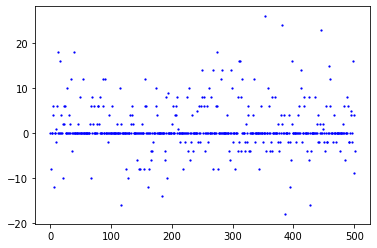

Ranked Trees beat Unranked Tree in 131 runs
Unranked Tree beat ranked trees in 85 runs
Both performed equally good in 286 runs


In [71]:
allInOne('CSVs/trees-2021-07-25_14-24-23-p0.05-n100.csv')


## Adversarial failures around D (varying failure rate)

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch,nodeAdditions,hopsPath,hopsRankedOne,hopsUnrankedOne,overallNodeAdditionsOne
0,1000,100,234,0.05,7,6,adversarial,0.35,7,7,3,4,4,7,7,7,2
1,999,100,250,0.05,3,2,adversarial,0.67,20,26,4,16,0,15,15,15,0
2,998,100,250,0.05,4,3,adversarial,0.84,15,15,3,12,0,12,12,12,0
3,997,100,267,0.05,7,6,adversarial,0.76,9,9,3,6,10,9,9,9,4
4,996,100,263,0.05,9,8,adversarial,0.69,12,12,4,8,4,12,12,12,2


Resilience Paths: 94.28857715430861%
Resilience One Tree: 100.0%
Resilience Trees: 100.0%


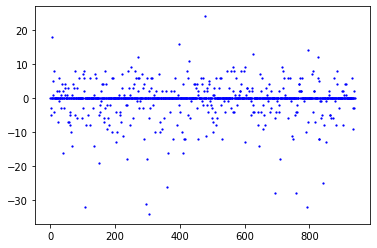

Trees beat paths in 162 runs
Paths beat trees in 166 runs
Both performed equally good in 613 runs


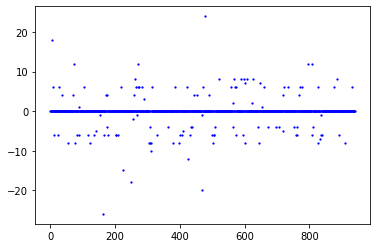

One Tree beat paths in 54 runs
Paths beat one tree in 68 runs
Both performed equally good in 819 runs


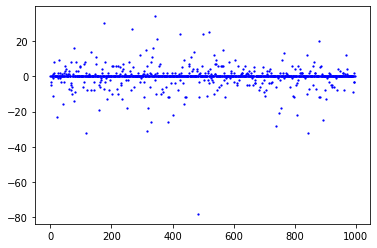

Multiple Trees beat One Tree in 172 runs
One Tree beat  multiple trees in 152 runs
Both performed equally good in 674 runs


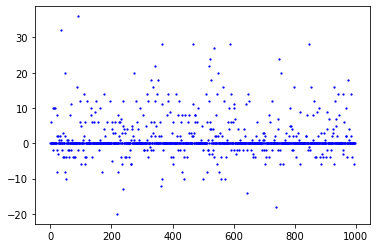

Ranked Trees beat Unranked Tree in 234 runs
Unranked Tree beat ranked trees in 120 runs
Both performed equally good in 644 runs


In [72]:
allInOne('CSVs/trees-2021-07-24_19-48-33-p0.05-n100.csv')

## Fixed adversarial failure rate 80%

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne
0,1000,100,248,0.05,3,2,adversarial,0.8,15,15,4,11,0,10,6,4,4,0,0
1,999,100,262,0.05,4,3,adversarial,0.8,29,29,5,24,0,23,18,23,23,18,0
2,998,100,248,0.05,6,5,adversarial,0.8,5,20,3,2,0,5,2,9,9,6,0
3,997,100,240,0.05,4,3,adversarial,0.8,12,16,4,8,0,14,10,20,20,16,0
4,996,100,243,0.05,3,2,adversarial,0.8,8,8,4,4,26,8,4,8,8,4,12


Resilience Paths: 88.64321608040201%
Resilience One Tree: 100.0%
Resilience Trees: 100.0%


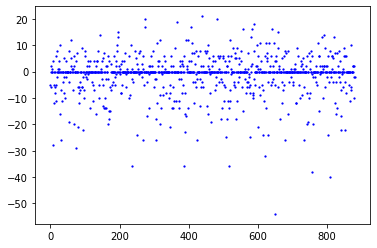

Trees beat paths in 243 runs
Paths beat trees in 262 runs
Both performed equally good in 377 runs


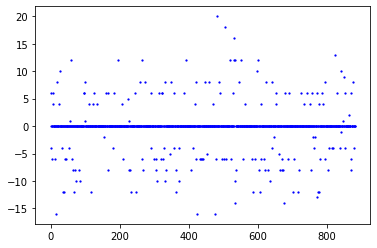

One Tree beat paths in 81 runs
Paths beat one tree in 105 runs
Both performed equally good in 696 runs


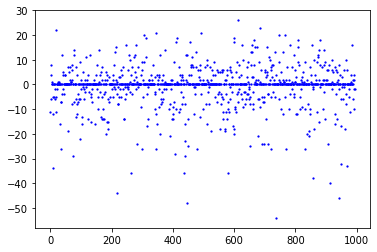

Multiple Trees beat One Tree in 281 runs
One Tree beat  multiple trees in 284 runs
Both performed equally good in 430 runs


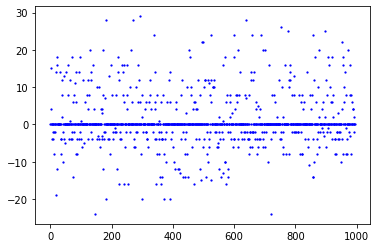

Ranked Trees beat Unranked Tree in 223 runs
Unranked Tree beat ranked trees in 249 runs
Both performed equally good in 523 runs


In [73]:
allInOne('CSVs/trees-2021-07-25_14-37-35-p0.05-n100.csv')


## AFTER BUGFIX

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,56,graphml/AttMpls.graphml,4,3,clustered,0.7;-0.3,-1,-1,4,-5,6,-1,-5,-1,-1,-5,2,shortest
1,995,25,56,graphml/AttMpls.graphml,2,1,clustered,0.7;-0.3,3,3,3,0,2,-1,-4,3,3,0,2,shortest
2,994,25,56,graphml/AttMpls.graphml,4,3,clustered,0.7;-0.3,4,4,2,2,8,-1,-3,6,6,4,4,shortest
3,992,25,56,graphml/AttMpls.graphml,4,3,clustered,0.7;-0.3,4,4,3,1,12,14,11,14,14,11,6,shortest
4,991,25,56,graphml/AttMpls.graphml,2,1,clustered,0.7;-0.3,-1,-1,6,-7,8,-1,-7,-1,-1,-7,6,shortest


Resilience Paths: 43.262411347517734%
Resilience One Tree: 54.25531914893617%
Resilience Trees: 66.48936170212765%


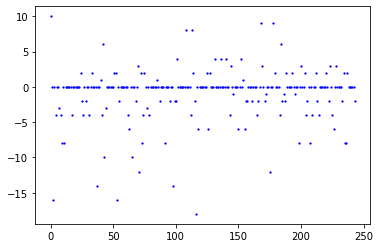

Trees beat paths in 38 runs
Paths beat trees in 68 runs
Both performed equally good in 138 runs


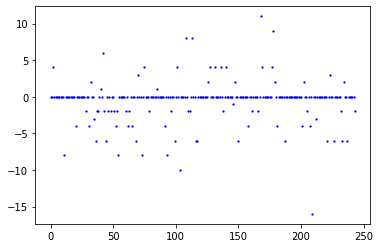

One Tree beat paths in 24 runs
Paths beat one tree in 51 runs
Both performed equally good in 169 runs


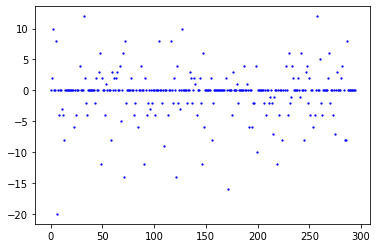

Multiple Trees beat One Tree in 56 runs
One Tree beat  multiple trees in 74 runs
Both performed equally good in 165 runs


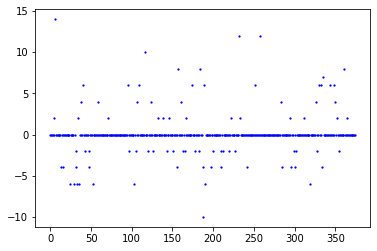

Ranked Trees beat Unranked Tree in 39 runs
Unranked Tree beat ranked trees in 44 runs
Both performed equally good in 292 runs


In [4]:
allInOne('CSVs/trees-2021-08-08_13-05-29-n25.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,999,25,56,graphml/AttMpls.graphml,2,1,clustered,0.6;-0.3,-1,-1,4,-5,0,-1,-5,-1,-1,-5,0,shortest
1,998,25,56,graphml/AttMpls.graphml,4,3,clustered,0.6;-0.3,3,3,3,0,0,3,0,3,3,0,0,shortest
2,997,25,56,graphml/AttMpls.graphml,4,3,clustered,0.6;-0.3,7,7,3,4,0,5,2,7,7,4,0,shortest
3,996,25,56,graphml/AttMpls.graphml,5,4,clustered,0.6;-0.3,-1,-1,7,-8,8,-1,-8,-1,-1,-8,4,shortest
4,995,25,56,graphml/AttMpls.graphml,4,3,clustered,0.6;-0.3,8,8,3,5,0,-1,-4,-1,-1,-4,0,shortest


Resilience Paths: 67.1590909090909%
Resilience One Tree: 78.86363636363637%
Resilience Trees: 90.79545454545455%


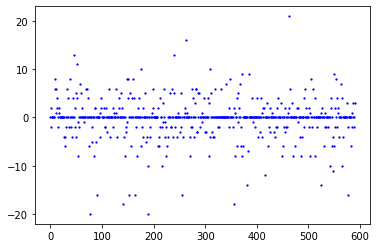

Trees beat paths in 140 runs
Paths beat trees in 152 runs
Both performed equally good in 299 runs


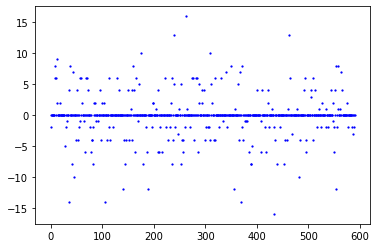

One Tree beat paths in 93 runs
Paths beat one tree in 113 runs
Both performed equally good in 385 runs


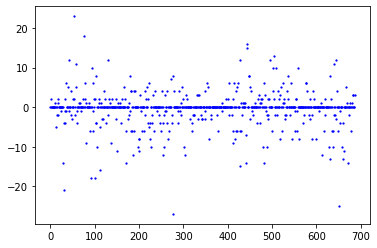

Multiple Trees beat One Tree in 146 runs
One Tree beat  multiple trees in 171 runs
Both performed equally good in 371 runs


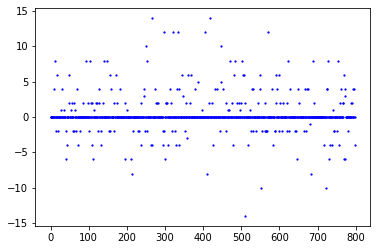

Ranked Trees beat Unranked Tree in 129 runs
Unranked Tree beat ranked trees in 84 runs
Both performed equally good in 586 runs


In [6]:
allInOne('CSVs/trees-2021-08-08_13-09-49-n25.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,56,graphml/AttMpls.graphml,4,3,clustered,0.6;-0.3,3,9,3,0,0,5,2,3,5,0,0,edgeCount
1,999,25,56,graphml/AttMpls.graphml,5,4,clustered,0.6;-0.3,6,2,2,4,2,2,0,10,10,8,2,edgeCount
2,998,25,56,graphml/AttMpls.graphml,2,1,clustered,0.6;-0.3,4,3,3,1,0,3,0,3,3,0,0,edgeCount
3,996,25,56,graphml/AttMpls.graphml,2,1,clustered,0.6;-0.3,4,4,4,0,4,-1,-5,-1,-1,-5,4,edgeCount
4,995,25,56,graphml/AttMpls.graphml,2,1,clustered,0.6;-0.3,-1,-1,5,-6,6,-1,-6,-1,-1,-6,6,edgeCount


Resilience Paths: 64.16382252559727%
Resilience One Tree: 76.3367463026166%
Resilience Trees: 88.39590443686008%


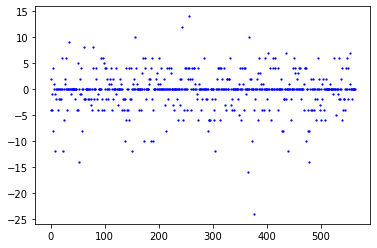

Trees beat paths in 143 runs
Paths beat trees in 155 runs
Both performed equally good in 266 runs


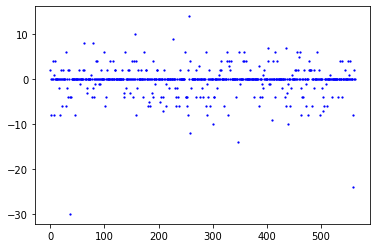

One Tree beat paths in 100 runs
Paths beat one tree in 114 runs
Both performed equally good in 350 runs


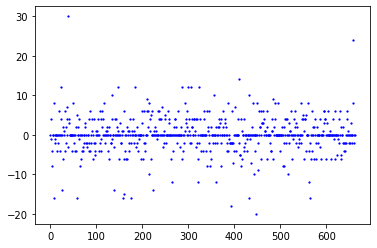

Multiple Trees beat One Tree in 215 runs
One Tree beat  multiple trees in 194 runs
Both performed equally good in 254 runs


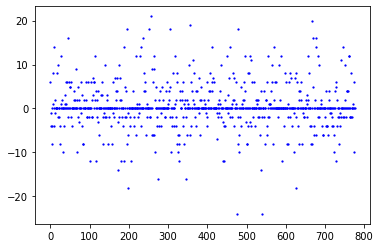

Ranked Trees beat Unranked Tree in 239 runs
Unranked Tree beat ranked trees in 210 runs
Both performed equally good in 328 runs


In [7]:
allInOne('CSVs/trees-2021-08-08_13-33-06-n25.csv')


### Reverse=False

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,56,graphml/AttMpls.graphml,3,2,clustered,0.6;-0.3,7,7,4,3,0,-1,-5,-1,-1,-5,0,edgeCount
1,999,25,56,graphml/AttMpls.graphml,4,3,clustered,0.6;-0.3,3,7,2,1,0,5,3,3,7,1,0,edgeCount
2,998,25,56,graphml/AttMpls.graphml,3,2,clustered,0.6;-0.3,15,17,5,10,4,-1,-6,-1,-1,-6,2,edgeCount
3,997,25,56,graphml/AttMpls.graphml,3,2,clustered,0.6;-0.3,14,13,3,11,0,6,3,10,10,7,0,edgeCount
4,996,25,56,graphml/AttMpls.graphml,2,1,clustered,0.6;-0.3,17,25,5,12,0,11,6,11,11,6,0,edgeCount


Resilience Paths: 63.93063583815029%
Resilience One Tree: 78.61271676300578%
Resilience Trees: 90.98265895953757%


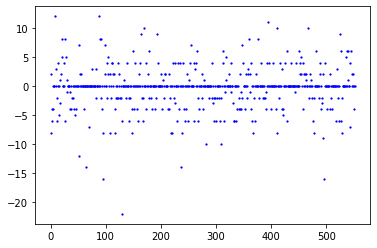

Trees beat paths in 125 runs
Paths beat trees in 154 runs
Both performed equally good in 274 runs


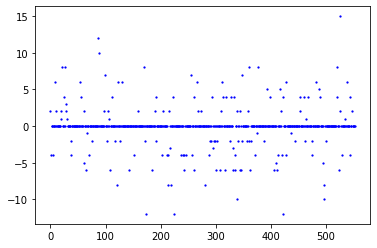

One Tree beat paths in 70 runs
Paths beat one tree in 81 runs
Both performed equally good in 402 runs


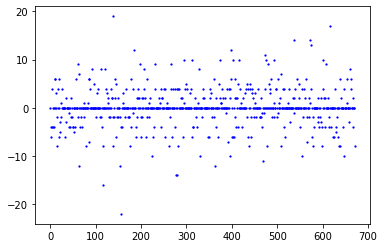

Multiple Trees beat One Tree in 185 runs
One Tree beat  multiple trees in 160 runs
Both performed equally good in 327 runs


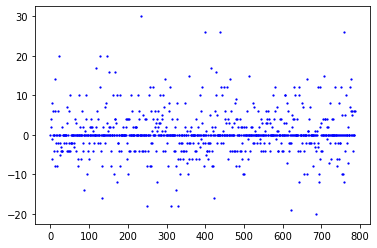

Ranked Trees beat Unranked Tree in 232 runs
Unranked Tree beat ranked trees in 210 runs
Both performed equally good in 345 runs


In [9]:
allInOne('CSVs/trees-2021-08-08_14-32-46-n25.csv')



,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,197,243,graphml/Cogentco.graphml,2,1,clustered,0.6;-0.3,18,18,18,0,0,18,0,18,18,0,0,edgeCount
1,999,197,243,graphml/Cogentco.graphml,2,1,clustered,0.6;-0.3,38,38,17,21,0,38,21,38,38,21,0,edgeCount
2,998,197,243,graphml/Cogentco.graphml,2,1,clustered,0.6;-0.3,18,18,16,2,0,18,2,18,18,2,0,edgeCount
3,997,197,243,graphml/Cogentco.graphml,2,1,clustered,0.6;-0.3,4,4,4,0,2,4,0,20,4,16,2,edgeCount
4,996,197,243,graphml/Cogentco.graphml,1,0,clustered,0.6;-0.3,7,7,7,0,0,7,0,7,7,0,0,edgeCount


Resilience Paths: 73.11977715877437%
Resilience One Tree: 88.3008356545961%
Resilience Trees: 93.03621169916435%


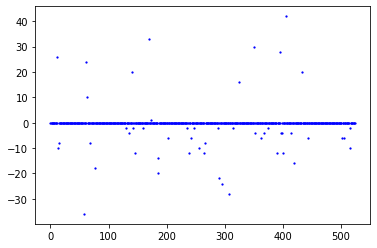

Trees beat paths in 11 runs
Paths beat trees in 40 runs
Both performed equally good in 474 runs


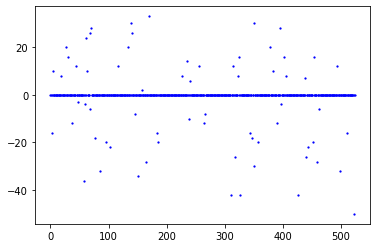

One Tree beat paths in 31 runs
Paths beat one tree in 36 runs
Both performed equally good in 458 runs


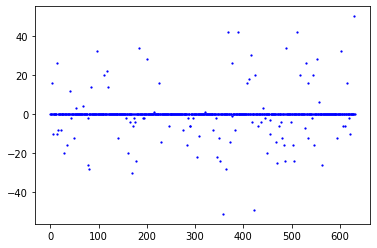

Multiple Trees beat One Tree in 34 runs
One Tree beat  multiple trees in 70 runs
Both performed equally good in 528 runs


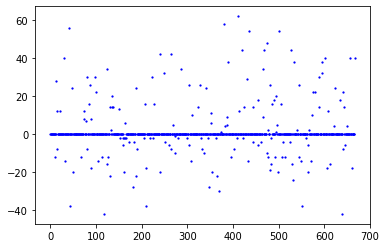

Ranked Trees beat Unranked Tree in 88 runs
Unranked Tree beat ranked trees in 84 runs
Both performed equally good in 496 runs


In [10]:
allInOne('CSVs/trees-2021-08-08_14-44-09-n197.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,113,161,graphml/Deltacom.graphml,2,1,clustered,0.6;-0.3,23,23,8,15,4,23,15,9,53,1,4,edgeCount
1,999,113,161,graphml/Deltacom.graphml,4,3,clustered,0.6;-0.3,24,24,6,18,2,25,19,25,24,19,2,edgeCount
2,998,113,161,graphml/Deltacom.graphml,1,0,clustered,0.6;-0.3,-1,-1,12,-13,4,-1,-13,-1,-1,-13,4,edgeCount
3,996,113,161,graphml/Deltacom.graphml,2,1,clustered,0.6;-0.3,16,16,15,1,2,44,29,44,16,29,2,edgeCount
4,995,113,161,graphml/Deltacom.graphml,2,1,clustered,0.6;-0.3,21,21,8,13,2,21,13,9,49,1,2,edgeCount


Resilience Paths: 72.80927835051546%
Resilience One Tree: 86.34020618556701%
Resilience Trees: 90.33505154639175%


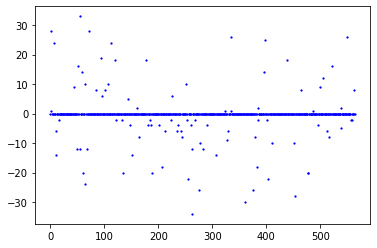

Trees beat paths in 36 runs
Paths beat trees in 57 runs
Both performed equally good in 472 runs


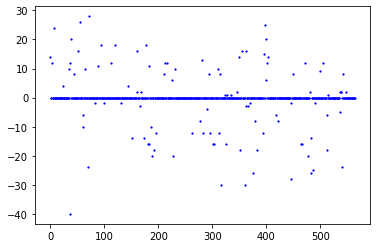

One Tree beat paths in 55 runs
Paths beat one tree in 51 runs
Both performed equally good in 459 runs


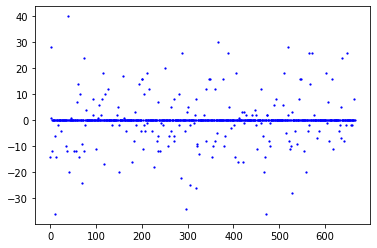

Multiple Trees beat One Tree in 80 runs
One Tree beat  multiple trees in 101 runs
Both performed equally good in 485 runs


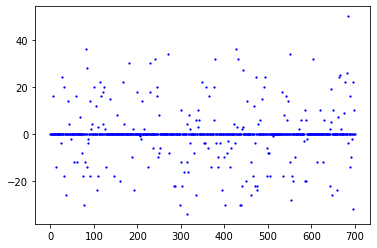

Ranked Trees beat Unranked Tree in 94 runs
Unranked Tree beat ranked trees in 95 runs
Both performed equally good in 512 runs


In [11]:
allInOne('CSVs/trees-2021-08-08_14-45-37-n113.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,999,149,193,graphml/GtsCe.graphml,1,0,clustered,0.6;-0.3,13,67,13,0,6,13,0,13,67,0,6,edgeCount
1,997,149,193,graphml/GtsCe.graphml,2,1,clustered,0.6;-0.3,59,59,15,44,0,59,44,59,59,44,0,edgeCount
2,996,149,193,graphml/GtsCe.graphml,2,1,clustered,0.6;-0.3,14,14,14,0,0,14,0,14,14,0,0,edgeCount
3,995,149,193,graphml/GtsCe.graphml,1,0,clustered,0.6;-0.3,3,25,3,0,4,3,0,3,25,0,4,edgeCount
4,994,149,193,graphml/GtsCe.graphml,2,1,clustered,0.6;-0.3,40,40,15,25,0,40,25,40,40,25,0,edgeCount


Resilience Paths: 76.99724517906336%
Resilience One Tree: 86.63911845730028%
Resilience Trees: 91.04683195592287%


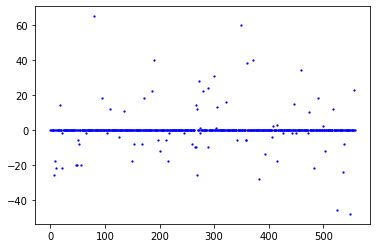

Trees beat paths in 30 runs
Paths beat trees in 45 runs
Both performed equally good in 484 runs


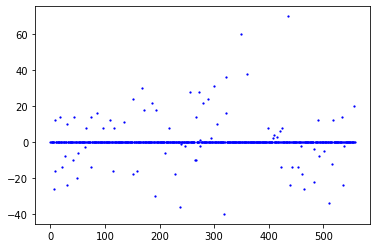

One Tree beat paths in 41 runs
Paths beat one tree in 38 runs
Both performed equally good in 480 runs


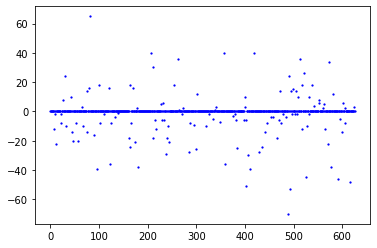

Multiple Trees beat One Tree in 48 runs
One Tree beat  multiple trees in 81 runs
Both performed equally good in 498 runs


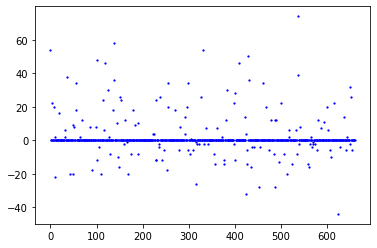

Ranked Trees beat Unranked Tree in 82 runs
Unranked Tree beat ranked trees in 70 runs
Both performed equally good in 509 runs


In [12]:
allInOne('CSVs/trees-2021-08-08_14-47-03-n149.csv')



,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,110,148,graphml/Interoute.graphml,2,1,clustered,0.6;-0.3,-1,-1,14,-15,2,-1,-15,-1,-1,-15,2,edgeCount
1,998,110,148,graphml/Interoute.graphml,3,2,clustered,0.6;-0.3,54,54,11,43,2,54,43,28,62,17,2,edgeCount
2,997,110,148,graphml/Interoute.graphml,3,2,clustered,0.6;-0.3,38,24,10,28,0,36,26,36,36,26,0,edgeCount
3,996,110,148,graphml/Interoute.graphml,2,1,clustered,0.6;-0.3,6,6,6,0,2,6,0,6,14,0,2,edgeCount
4,995,110,148,graphml/Interoute.graphml,2,1,clustered,0.6;-0.3,33,33,13,20,0,33,20,33,33,20,0,edgeCount


Resilience Paths: 73.38709677419355%
Resilience One Tree: 84.94623655913979%
Resilience Trees: 90.45698924731182%


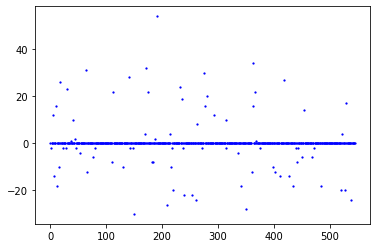

Trees beat paths in 32 runs
Paths beat trees in 48 runs
Both performed equally good in 466 runs


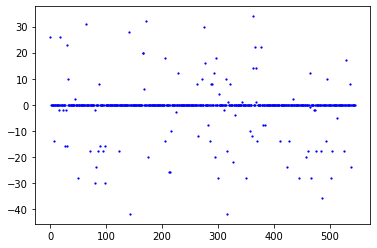

One Tree beat paths in 38 runs
Paths beat one tree in 59 runs
Both performed equally good in 449 runs


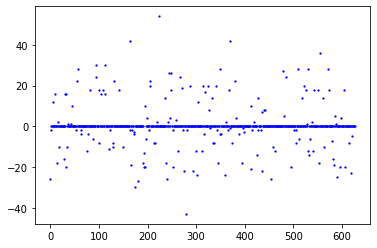

Multiple Trees beat One Tree in 76 runs
One Tree beat  multiple trees in 92 runs
Both performed equally good in 460 runs


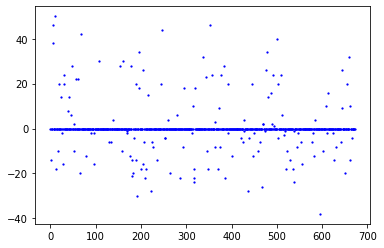

Ranked Trees beat Unranked Tree in 64 runs
Unranked Tree beat ranked trees in 86 runs
Both performed equally good in 523 runs


In [13]:
allInOne('CSVs/trees-2021-08-08_14-48-35-n110.csv')



,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,998,93,103,graphml/Oteglobe.graphml,1,0,clustered,0.6;-0.3,10,10,10,0,0,10,0,10,10,0,0,edgeCount
1,997,93,103,graphml/Oteglobe.graphml,2,1,clustered,0.6;-0.3,24,24,10,14,0,-1,-11,-1,-1,-11,0,edgeCount
2,995,93,103,graphml/Oteglobe.graphml,2,1,clustered,0.6;-0.3,49,33,13,36,4,33,20,33,33,20,4,edgeCount
3,994,93,103,graphml/Oteglobe.graphml,1,0,clustered,0.6;-0.3,8,12,8,0,6,8,0,8,12,0,6,edgeCount
4,993,93,103,graphml/Oteglobe.graphml,2,1,clustered,0.6;-0.3,24,24,14,10,0,-1,-15,-1,-1,-15,0,edgeCount


Resilience Paths: 71.25506072874494%
Resilience One Tree: 84.21052631578947%
Resilience Trees: 87.71929824561403%


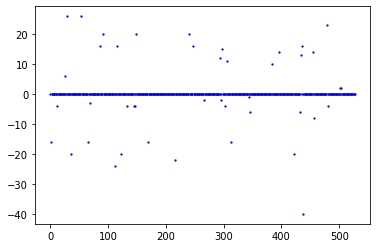

Trees beat paths in 20 runs
Paths beat trees in 23 runs
Both performed equally good in 485 runs


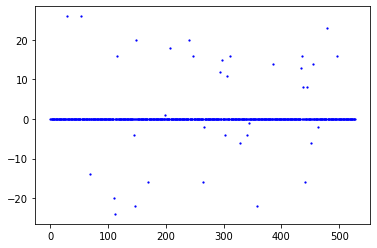

One Tree beat paths in 20 runs
Paths beat one tree in 16 runs
Both performed equally good in 492 runs


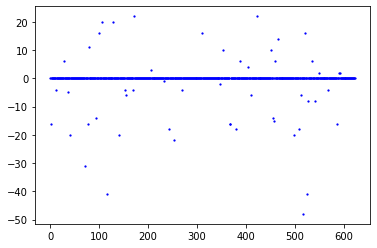

Multiple Trees beat One Tree in 20 runs
One Tree beat  multiple trees in 32 runs
Both performed equally good in 572 runs


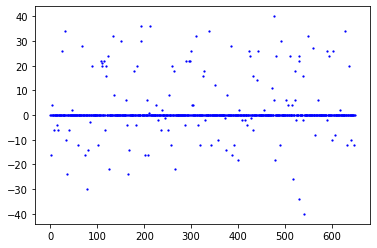

Ranked Trees beat Unranked Tree in 72 runs
Unranked Tree beat ranked trees in 57 runs
Both performed equally good in 521 runs


In [14]:
allInOne('CSVs/trees-2021-08-08_14-50-24-n93.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,113,161,graphml/Deltacom.graphml,2,1,adversarial,0.8,2,2,2,0,0,2,0,2,2,0,0,edgeCount
1,999,113,161,graphml/Deltacom.graphml,1,0,adversarial,0.8,17,79,17,0,2,17,0,17,79,0,2,edgeCount
2,998,113,161,graphml/Deltacom.graphml,2,1,adversarial,0.8,6,6,6,0,4,6,0,9,24,3,4,edgeCount
3,997,113,161,graphml/Deltacom.graphml,3,2,adversarial,0.8,24,24,8,16,0,42,34,24,24,16,0,edgeCount
4,996,113,161,graphml/Deltacom.graphml,3,2,adversarial,0.8,11,11,11,0,2,11,0,11,11,0,2,edgeCount


Resilience Paths: 82.2429906542056%
Resilience One Tree: 100.0%
Resilience Trees: 100.0%


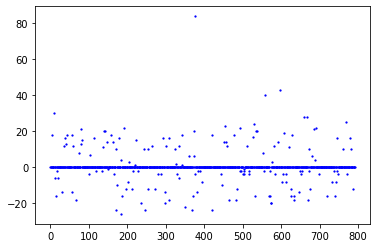

Trees beat paths in 75 runs
Paths beat trees in 87 runs
Both performed equally good in 630 runs


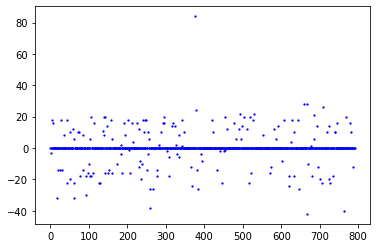

One Tree beat paths in 89 runs
Paths beat one tree in 76 runs
Both performed equally good in 627 runs


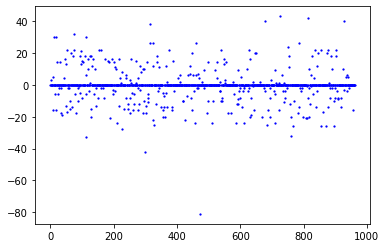

Multiple Trees beat One Tree in 135 runs
One Tree beat  multiple trees in 182 runs
Both performed equally good in 646 runs


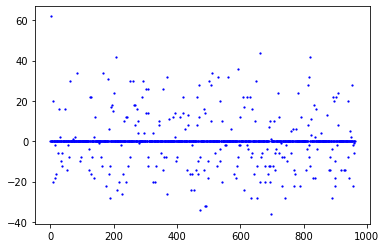

Ranked Trees beat Unranked Tree in 110 runs
Unranked Tree beat ranked trees in 138 runs
Both performed equally good in 715 runs


In [15]:
#adversarial failures 80%
allInOne('CSVs/trees-2021-08-08_14-52-48-n113.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,113,161,graphml/Deltacom.graphml,2,1,adversarial,0.95,8,8,8,0,0,8,0,8,8,0,0,edgeCount
1,999,113,161,graphml/Deltacom.graphml,2,1,adversarial,0.95,27,49,7,20,2,21,14,11,35,4,2,edgeCount
2,998,113,161,graphml/Deltacom.graphml,2,1,adversarial,0.95,5,5,5,0,0,5,0,5,5,0,0,edgeCount
3,997,113,161,graphml/Deltacom.graphml,2,1,adversarial,0.95,19,19,7,12,0,15,8,15,15,8,0,edgeCount
4,996,113,161,graphml/Deltacom.graphml,3,2,adversarial,0.95,8,8,4,4,0,8,4,8,8,4,0,edgeCount


Resilience Paths: 82.32271325796505%
Resilience One Tree: 100.0%
Resilience Trees: 100.0%


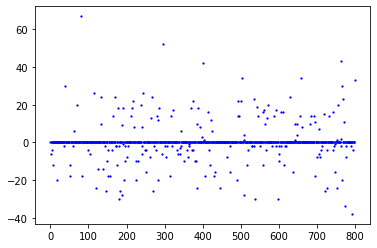

Trees beat paths in 82 runs
Paths beat trees in 121 runs
Both performed equally good in 598 runs


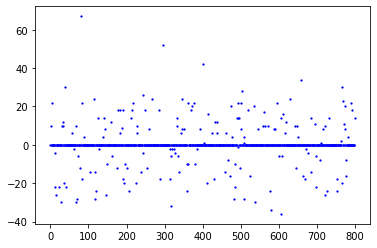

One Tree beat paths in 98 runs
Paths beat one tree in 80 runs
Both performed equally good in 623 runs


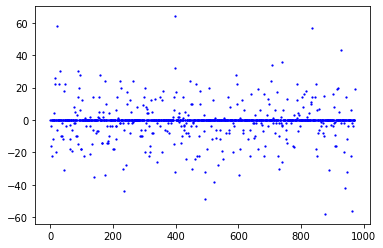

Multiple Trees beat One Tree in 133 runs
One Tree beat  multiple trees in 194 runs
Both performed equally good in 646 runs


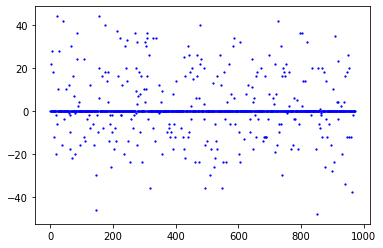

Ranked Trees beat Unranked Tree in 139 runs
Unranked Tree beat ranked trees in 139 runs
Both performed equally good in 695 runs


In [16]:
#adversarial failures 95%
allInOne('CSVs/trees-2021-08-08_14-57-45-n113.csv')

